# Mall Customers Segmentation

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

### Exploratory Data Analysis

In [68]:
df = pd.read_csv("Mall_Customers.csv")

In [69]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [71]:
df.drop(columns=['Gender'], inplace=True)

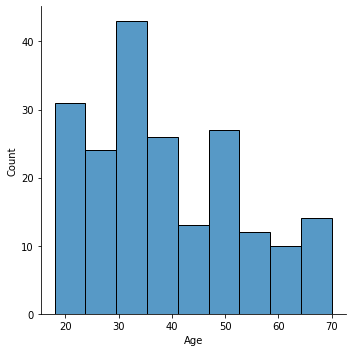

In [72]:
sns.displot(df["Age"])

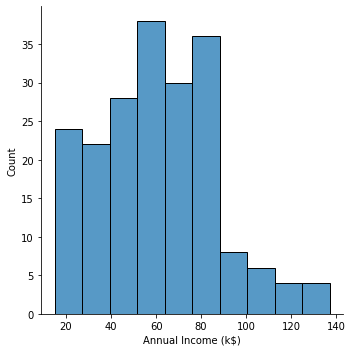

In [73]:
sns.displot(df["Annual Income (k$)"])

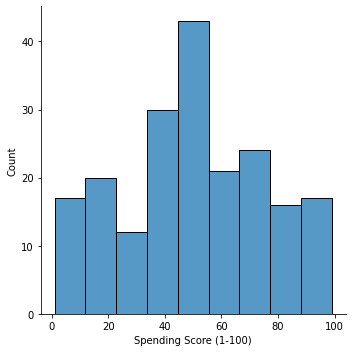

In [74]:
sns.displot(df["Spending Score (1-100)"])

### Finding the Optimal Number of Clusters with Elbow Method

In [75]:
sum_of_sqr_dist = {}

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df)
    sum_of_sqr_dist[k] = km.inertia_

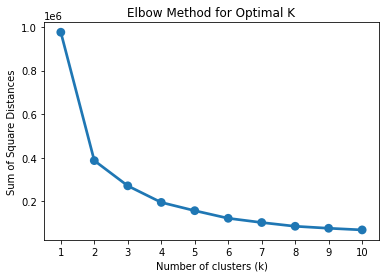

In [76]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [96]:
### Finding the Optimal Number of Clusters with Dendrogram

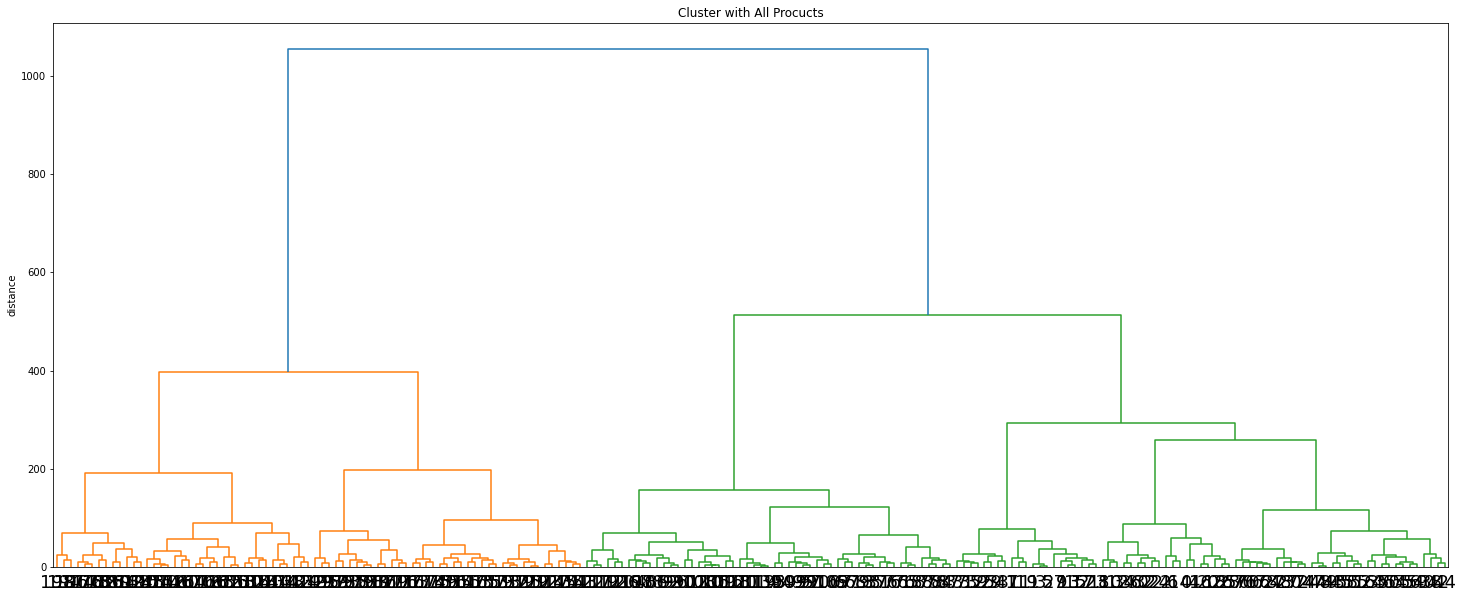

In [98]:
#Finding optimal number of cluster using dendrogram
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

Z = linkage(df, 'ward')

#plot Dendrogram os clusters
plt.figure(figsize = (25, 10))
plt.title('Cluster with All Procucts')
plt.ylabel('distance')
dendrogram(
    Z,
    labels = df.index,
    leaf_rotation = 0.,
    leaf_font_size = 18.,
)
plt.show()

### K-Means Clustering

In [99]:
Model = KMeans(n_clusters=3, init="k-means++", max_iter=1000, random_state=42)
Model.fit_predict(df)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [100]:
print("Labels", Model.labels_)

Labels [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [101]:
print("Centroids", Model.cluster_centers_)

Centroids [[ 96.98591549  43.1971831   59.35211268  50.5915493 ]
 [166.5         36.04411765  88.91176471  50.20588235]
 [ 31.01639344  36.91803279  30.36065574  49.73770492]]


In [102]:
df_cluster = df.copy()
df_cluster["Cluster"] = Model.fit_predict(df)

In [103]:
df_cluster.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,2
3,4,23,16,77,2
4,5,31,17,40,2


### Visualizing Clusters

In [104]:
Colors = ['silver', 'blue', 'red']               #Set of colors to be used
df_cluster['Color'] = df_cluster['Cluster'].map(lambda p: Colors[p])         #Assign colors to the clusters

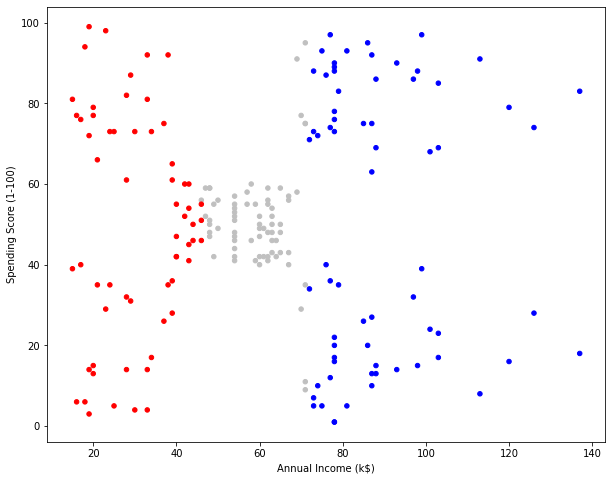

In [105]:
df.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        c=df_cluster["Color"],
        figsize=(10,8))
plt.show()

__3D Visualization__

In [106]:
labels3 = Model.labels_
centroids3 = Model.cluster_centers_
df_cli = df_cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]

In [107]:
import plotly as py
import plotly.graph_objs as go 

df_cli['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df_cli['Age'],
    y= df_cli['Annual Income (k$)'],
    z= df_cli['Spending Score (1-100)'],
    mode='markers',
     marker=dict(
        color = df_cli['label3'], 
        size= 5,
        line=dict(
            color= df_cli['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income (k$)'),
            zaxis = dict(title  = 'Spending Score (1-100)')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

C:\Users\pedro\Anaconda3\envs\PowerBI\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Work in progress ...